In [31]:
import pandas as pd
import numpy as np
mport matplotlib.pyplot as plt

db = pd.read_csv("/Users/home/Dropbox/Databases/fifa-world-cup/WorldCupMatches.csv")



In [32]:
db = db[['Year', 'Home Team Name', 'Home Team Goals',
         'Away Team Goals', 'Away Team Name']]



#db.describe()
#db0 = (db.groupby(['Year'])['Total_goals']
 #        .agg([('average_goals','mean'),('total_goals','sum'), ('total_games','count')])
 #        .reset_index())
#db0

In [33]:
#Aggregated information from world cups
db3 = pd.read_csv("/Users/home/Dropbox/Databases/fifa-world-cup/WorldCups.csv")
# Tranforms the attendance into an integer
db3['Attendance']=db3['Attendance'].replace('\.','',regex=True).astype(int)
db3 = db3.replace('Germany FR', 'Germany')
db3.at[16, 'Country'] = 'Korea Republic'


In [34]:
# World cup 2018

db2 = pd.read_csv("/Users/home/Dropbox/Databases/fifa-world-cup/Cup.Russia.Matches.csv")

# Order the data to make all aggregate data
db2 = db2[['Home Team',
           'Home Team Goals',  'Away Team Goals',
           'Away Team', 'Total Goals', 'Attendance']]

db2['Year'] = 2018
db2['Country'] = 'Russia'
db2['GoalsScored'] = db2['Total Goals'].sum()

# Number of  Qualified teams

# Extract useful columns
db2_1 = db2['Home Team']
db2_2 = db2['Away Team']

# Rename columns to merge
db2_1.columns = ['Teams']
db2_2.columns = ['Teams']

# Row binding
data_merging = [db2_1, db2_2]
db2_12 = pd.concat(data_merging)

# Extract only unique cases
number = len(db2_12.unique().tolist())
db2['Qualifiedteams'] =  number

# Calculate total attendance and number of matches playes
db2['MatchesPlayed'] = db2['Home Team'].count()
db2['Total_attendance'] = db2['Attendance'].sum()

# Filter columns
db2_aggregation_var = db2[['Year', 'Country', 'GoalsScored',
                           'Qualifiedteams', 'MatchesPlayed',
                           'Total_attendance']]
# Create missing columns
db2_aggregation_var['Winner'] = 'France'
db2_aggregation_var['Runners-Up'] = 'Croatia' 
db2_aggregation_var['Third'] = 'Belgium'                    
db2_aggregation_var['Fourth'] = 'England' 

# Re organize columns
db2_aggregation_var = db2_aggregation_var[['Year', 'Country',
                                           'Winner', 'Runners-Up',
                                           'Third', 'Fourth', 
                                           'GoalsScored', 'Qualifiedteams',
                                           'MatchesPlayed', 'Total_attendance']]                    

# Rename columns to bind
db2_aggregation_var.columns =['Year', 'Country',
                                           'Winner', 'Runners-Up',
                                           'Third', 'Fourth', 
                                           'GoalsScored', 'QualifiedTeams',
                                           'MatchesPlayed', 'Attendance']                   

# Extract single row
db2_aggregation_var = db2_aggregation_var[0:1]
# Row binding
wc_row_bind = [db3, db2_aggregation_var]
WC_general_final = pd.concat(wc_row_bind)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [42]:
# Graphs of averaged golas per WC
WC_general_final['Mean_goals'] = WC_general_final['GoalsScored']/WC_general_final['MatchesPlayed']


,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance,Mean_goals
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590549,3.888889
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363000,4.117647
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375700,4.666667
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1045246,4.000000
4,1954,Switzerland,Germany,Hungary,Austria,Uruguay,140,16,26,768607,5.384615
5,1958,Sweden,Brazil,Sweden,France,Germany,126,16,35,819810,3.600000
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893172,2.781250
7,1966,England,England,Germany,Portugal,Soviet Union,89,16,32,1563135,2.781250
8,1970,Mexico,Brazil,Italy,Germany,Uruguay,95,16,32,1603975,2.968750
9,1974,Germany,Germany,Netherlands,Poland,Brazil,97,16,38,1865753,2.552632


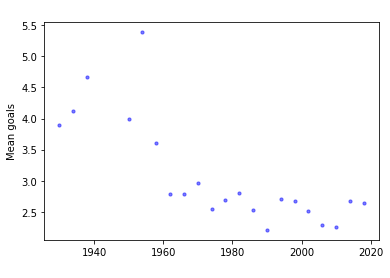

In [41]:
# Graficar los promedios

plt.scatter(WC_general_final['Year'],
            WC_general_final['Mean_goals'],
            s=10, c='blue', alpha=0.5)
plt.title(' ')
plt.xlabel(' ')
plt.ylabel('Mean goals')
plt.show()



In [ ]:
# Descriptive statistics finding hidden patterns

# Which team is the most efficient when it reaches the final?

WC_general_final_winner = pd.DataFrame(WC_general_final['Winner'])
WC_general_final_runnerup = pd.DataFrame(WC_general_final['Runners-Up'])

WC_general_final_winner['First'] = 1
WC_general_final_runnerup['Second'] = 1

WC_general_final_winner = pd.DataFrame(WC_general_final_winner.groupby('Winner')['First'].sum()) # Aggregate get goals

WC_general_final_winner['Country']=WC_general_final_winner.index
WC_general_final_winner = WC_general_final_winner.reset_index(drop=True)


WC_general_final_runnerup = pd.DataFrame(WC_general_final_runnerup.groupby('Runners-Up')['Second'].sum())

WC_general_final_runnerup['Country'] = WC_general_final_runnerup.index 
WC_general_final_runnerup = WC_general_final_runnerup.reset_index(drop=True)

WC_general_final_win_runner =  pd.merge(WC_general_final_winner, 
                                        WC_general_final_runnerup,
                                        how='outer', left_on='Country', 
                                        right_on='Country')

WC_general_final_win_runner = WC_general_final_win_runner.replace(to_replace= np.nan,
                                                                  value = 0)

WC_general_final_win_runner['Total'] = WC_general_final_win_runner['First']+ WC_general_final_win_runner['Second']
WC_general_final_win_runner['Proportion_wins'] = WC_general_final_win_runner['First']/WC_general_final_win_runner['Total']


In [ ]:
# How many times a European team went to the finals?
# How many times a Latin American team went to the finals?

conditions = [
    (WC_general_final_win_runner['Country'] == 'Brazil') | (WC_general_final_win_runner['Country'] == 'Uruguay') | (WC_general_final_win_runner['Country'] == 'Argentina'),
    (WC_general_final_win_runner['Country'] != 'Brazil') | (WC_general_final_win_runner['Country'] != 'Uruguay') | (WC_general_final_win_runner['Country'] != 'Argentina')]

values = ['Latin America', 'Europe']

WC_general_final_win_runner['Continent'] = np.select(conditions, values)
Finals_app = WC_general_final_win_runner.groupby('Continent')['Total'].sum()
Finals_app


In [ ]:
# How many teams that were host won 

WC_general_final.loc[WC_general_final['Country'] == WC_general_final['Winner'], 'Host_win']  = 1
WC_general_final.loc[WC_general_final['Country'] != WC_general_final['Winner'], 'Host_win']  = 0
Resultado = WC_general_final['Host_win'].sum()/len(WC_general_final['Host_win'])
Resultado

In [ ]:
# How many teams that were host lost finals
WC_general_final.loc[WC_general_final['Country'] == WC_general_final['Runners-Up'], 'Host_loss'] = 1
WC_general_final.loc[WC_general_final['Country'] != WC_general_final['Runners-Up'], 'Host_loss'] = 0
Resultado2 = WC_general_final['Host_loss'].sum()/len(WC_general_final['Host_loss'])
Resultado2

In [ ]:
# How many host teams at least went to the semifinals


def function(row):
    if row['Country'] == row['Winner']:
        val = 1
    elif row['Country'] == row['Runners-Up']:
        val = 1
    elif row['Country'] == row['Third']: 
        val = 1
    elif row['Country'] == row['Fourth']:
        val = 1
    else:
        val = 0
    return val
        
WC_general_final['Host_semifinal'] = WC_general_final.apply(function, axis=1)  
WC_general_final.reset_index(drop=True)

Resultado3 = WC_general_final['Host_semifinal'].sum()/len(WC_general_final['Host_semifinal'])
Resultado3

In [ ]:
# Create a variable of Year for Russia
db2['Year'] = 2018
# Re organize the variables
db2_matches = db2[['Year','Home Team', 'Home Team Goals', 'Away Team Goals',
                   'Away Team']]


# Rename the variables
db2_matches.columns = ['Year', 'Home Team Name', 'Home Team Goals', 
                      'Away Team Goals', 'Away Team Name']

matches_bind = [db,db2_matches]
WC_matches_final = pd.concat(matches_bind)
